## Classification: Digits Dataset

In [1]:
# prepare environment
% matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn
from sklearn import metrics

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import warnings
warnings.filterwarnings('ignore', message='kneighbors*')
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
# import data set
from sklearn import datasets
digits = datasets.load_digits()

In [4]:
type(digits)

sklearn.datasets.base.Bunch

In [5]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

## The Data

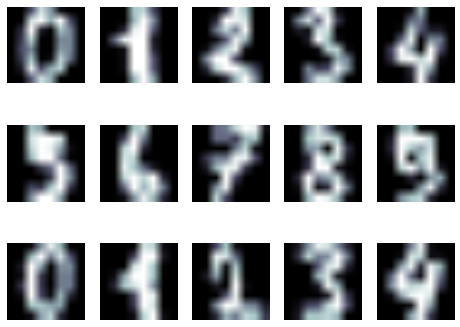

In [6]:
# plot the images in the data set
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.bone)

## Splitting Data For Validation

To avoid over-fitting the data is split into two sub sets:
    - a training set X_train, y_train which is used for learning the parameters of a predictive model
    - a testing set X_test, y_test which is used for evaluating the fitted predictive model

In [7]:
X = digits.data   # features
y = digits.target # ground truth

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print (X.shape, X_train.shape, X_test.shape)

((1797, 64), (1347, 64), (450, 64))


## Three Classifiers
        1. K Nearest Neighbours
        2. Support Vector Machine
        3. Gaussian Naive Bayes


#### 1. K Nearest Neighbors

K nearest neighbour is a non parametric method that is simple to implement. It is a good starting point given the size of the data set. Strategy: given a new, unknown observation, look in the reference database which ones have the closest features and assign the predominant class.

In [8]:
# Instantiate and train and test classifier on the split data
from sklearn.neighbors import KNeighborsClassifier

# Test kNN
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("KNeighbors(n_neighbors={}): {:.3f}".format(n_neighbors, metrics.f1_score(y_test, y_pred)))

KNeighbors(n_neighbors=1): 0.991
KNeighbors(n_neighbors=2): 0.984
KNeighbors(n_neighbors=3): 0.987
KNeighbors(n_neighbors=4): 0.980
KNeighbors(n_neighbors=5): 0.980
KNeighbors(n_neighbors=6): 0.975
KNeighbors(n_neighbors=7): 0.978
KNeighbors(n_neighbors=8): 0.978
KNeighbors(n_neighbors=9): 0.978
KNeighbors(n_neighbors=10): 0.975


In [9]:
# Check resulting predictions
print(metrics.confusion_matrix(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 42  0  0  0  0  1  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  3  0  2  0  0  0  1 42  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


#### 2. Linear Support Vector

SVM by definition look for the maximum margin of the separating hyperplane which is a method that is considered to generalize well. However, it does not scale cost efficiently with large data sets, can be very memory intensive and the results are not always straightforward to interpret.

In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Check resulting predictions
print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  2  0  4  0]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  1 37  0  0  0  0  0]
 [ 0  0  0  1  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  3  1  0  0  1 37  2]
 [ 0  0  0  1  1  1  0  0  0 44]]


In [11]:
# Test SVC loss
for loss in ['l1', 'l2']:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LinearSVC(loss='{0}')".format(loss), metrics.f1_score(y_test, y_pred))

("LinearSVC(loss='l1')", 0.9272684695813258)
("LinearSVC(loss='l2')", 0.9271792292161124)


#### 3. Gaussian Naive Bayes

The Naive Bayes classifier is a simple yet efficient linear classifiers, here using a Gaussian distribution assumption. Naive classifiers often assume that the features in a dataset are mutually independent, an assumption that is frequently violated and in this case likely to make this a poor performing classifier.

In [12]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Check resulting predictions
print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  4  0]
 [ 0  7 20  2  0  0  0  0 15  0]
 [ 0  0  0 39  0  0  0  1  5  0]
 [ 0  1  0  0 31  0  0  6  0  0]
 [ 0  1  0  1  0 43  0  3  0  0]
 [ 0  0  1  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  6  0  1  0  1  0  2 38  0]
 [ 0  2  0  4  1  0  0  3  7 30]]


## Results

The results from each of the classifiers can be compared by looking at the F1 score. It is a score measuring the accuracy of the prediction and is between 0 and 1 - 0 being a poor estimator.

    - F1-score = precision.recall / (precision + recall)
    - Precision: nb. of true positives / total number of elements labeled in the positive class
    - Recall : nb. of true positives / total number of elements that are actually in the positive class

In [13]:
for Model in [KNeighborsClassifier, LinearSVC, GaussianNB]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(Model.__name__, metrics.f1_score(y_test, y_pred))

('KNeighborsClassifier', 0.97991778400254492)
('LinearSVC', 0.92902419055905539)
('GaussianNB', 0.83217053317735235)


Indeed the GaussianNB performs poorer than the other classifiers.